In [117]:
import numpy
import matplotlib.pyplot as plt 
import pandas
import mglearn
import scipy

import sklearn
import sklearn.ensemble              # import seperatley otherwise sub module won't be imported
import sklearn.neural_network        # import seperatley otherwise sub module won't be imported
from sklearn.cluster import KMeans

import graphviz
import mpl_toolkits.mplot3d as plt3dd

# Categorical Values

In [24]:
data = pandas.read_csv(r"adult.data",
                       header=None,
                       index_col=False,
                       names=[  'age', 'workclass', 'fnlwgt', 'education', 'education-num',
                                'marital-status', 'occupation', 'relationship', 'race', 'gender',
                                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                                'income']
                      );

data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week','occupation', 'income']];
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


#### Dummy vals

In [27]:
print(f"Orifinal feature:\t {list(data.columns)}\n\n");

data_dummies = pandas.get_dummies(data);
print(f"Orifinal feature:\t {list(data_dummies.columns)}\n\n");
data_dummies.head()

Orifinal feature:	 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']


Orifinal feature:	 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'oc

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,50,13,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,38,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,53,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,28,40,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


We can now use the values attribute to convert the data_dummies DataFrame into a
NumPy array, and then train a machine learning model on it. Be careful to separate
the target variable (which is now encoded in two income columns) from the data
before training a model. Including the output variable, or some derived property of
the output variable, into the feature representation is a very common mistake in
building supervised machine learning models

In [30]:
Features = data_dummies.loc[:,"age":"occupation_ Transport-moving"];
X = Features.values;
y = data_dummies["income_ >50K"].values;

print(f"X.shape : {X.shape} - y.shape : {y.shape}")

X.shape : (32561, 44) - y.shape : (32561,)


In [32]:
# Using raw X datra gives better performance than scaled data 80.92 > 80.89
# scaler = sklearn.preprocessing.RobustScaler()
# X_scaled = scaler.fit_transform(X);


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0);
logreg = sklearn.linear_model.LogisticRegression(max_iter=2500);
logreg.fit(X_train, y_train);
print("Test score : {:4.2f}".format(logreg.score(X_test,y_test)*100))

Test score : 80.94


#### Numbers can encode categoricals

In [91]:
demo_df = pandas.DataFrame({'Integer Feature':[ 0, 1, 2, 1 ],
                            'Categorical Feature': ['socks', 'fox', 'socks', 'box'] });
display(demo_df);
display(pandas.get_dummies(demo_df));

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,False,False,True
1,1,False,True,False
2,2,False,False,True
3,1,True,False,False


In [97]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str);
display(pandas.get_dummies(demo_df));

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,True,False,False,False,False,True
1,False,True,False,False,True,False
2,False,False,True,False,False,True
3,False,True,False,True,False,False


# Binning, Discretization, Linear Models, and Trees

In [2]:
X, y = mglearn.datasets.make_wave(n_samples=100);
line = numpy.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

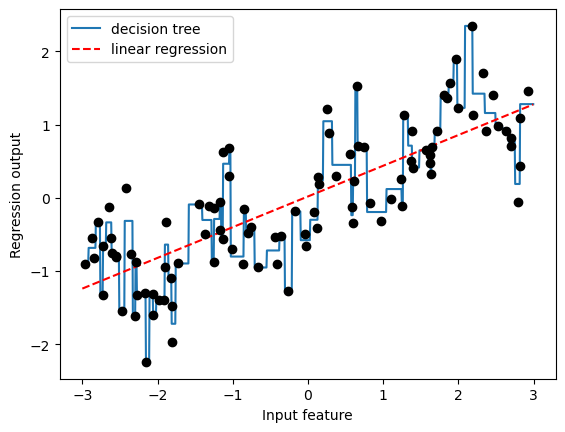

In [3]:
tree = sklearn.tree.DecisionTreeRegressor(min_samples_split=3).fit(X,y);
lin = sklearn.linear_model.LinearRegression().fit(X,y);


plt.figure();

plt.plot(line, tree.predict(line), label="decision tree");
plt.plot(line, lin.predict(line), '--r', label="linear regression");

plt.plot(X, y, 'ok');

plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best");

(-3.0, 3.0)

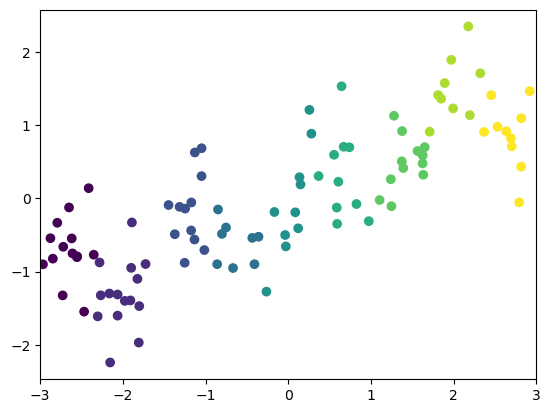

In [65]:
bins = numpy.linspace(-3,3,10);
which_bin = numpy.digitize(X, bins=bins);


# i = 3;
# mask = ((X < bins[i+1]) & (X > bins[i])).ravel();
# plt.scatter(X[mask],y[mask], c=which_bin);

plt.scatter(X, y, c=which_bin);
plt.xlim(-3,3)

In [167]:
which_bin[:5]

array([[4],
       [9],
       [7],
       [6],
       [2]], dtype=int64)

In [159]:
encoder = sklearn.preprocessing.OneHotEncoder(sparse_output=False);
X_binned = encoder.fit_transform(which_bin);
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]]
